# Investigate a Dataset-[Patients Noshows appointments-may-2016.csv]

# Introduction
The dataset collects infromation from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their
appointments. A number of characteristics about the patient are included in each row.

-'ScheduledDay'tells us on what day the patient set up their appointment

-'Neighbourhood' indicates the location of the hospital 

-'Scholarship' indicates whether or not the patient is enrolled in Brasillian welfare program Bosla Famila.


# DataSet Description
 Csv file contains data that will be analyized

# Question for Analysis

what are important factors for us to know to predict if a patient will show up for their scheudeld  appointments?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb 
from tabulate import tabulate
%matplotlib inline

In [2]:
#Upgrade pandas to use dataframe.explode() function.
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [908 lines of output]
  <string>:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-310\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-310\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-310\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-310\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-310\pandas
  creating build\lib.win-amd64-cpython-310\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-310\pandas\api
  creating build\lib.win-amd64-cpython-310\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-310\pa

# Data Wrangling 
in this part, data will be downloded, check its cleanliness and then trim and clean dataset for analysis

# General Properties

In [3]:
#loading data and print out a few lines. perform operations to inspect data
#  types and look for instance of missing or possibly errant data.
df=pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#exploring teh shape of data (row,col)
df.shape

(110527, 14)

In [5]:
#check for duplicates (is there two rows identical)
df.duplicated().sum()


0

In [6]:
#check the number of unique values (Are all these appointments for totally different patients or there are repeated patients)
if len(df['PatientId'].unique()) != 0:
    print("Only {} out of {} are unique()".format(len(df['PatientId'].unique()), df.shape[0]))
#if so, this means that more than one patient has multiple appointments 

Only 62299 out of 110527 are unique()


In [7]:
# check the number of duplicated patients IDd 
duplicated_isd=df['PatientId'].duplicated().sum()
if duplicated_isd !=0:
    print("Ther is {} duplicated ID".format(duplicated_isd))

Ther is 48228 duplicated ID


In [8]:
#check the number of duplicated patients Ids and Noshow
#to check if there were patients Ids duplicated but differ in the No Show Status.
#q1
rpeated_status=df.duplicated(['PatientId','No-show']).sum()

if rpeated_status !=0:
    print("Ther is {} patients Ids have the same status of showing or no,will removed in data cleaning\n".format(rpeated_status))

# Find duplicated rows based on 'PatientId' and 'No-show'
duplicated_rows = df[df.duplicated(['PatientId', 'No-show'], keep=False)]

# Display two examples of duplicated rows as a DataFrame
print("Two examples of duplicated rows:\n")


duplicated_df = duplicated_rows.head(2)

print(duplicated_df)


Ther is 38710 patients Ids have the same status of showing or no,will removed in data cleaning

Two examples of duplicated rows:

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  


In [9]:
# Display 'No-show' column for two examples of duplicated rows
# Display 'No-show' column for two examples of duplicated rows as a DataFrame
print("Two examples of duplicated 'No-show' column as DataFrame:\n")
print(duplicated_rows['No-show'].head(2).to_frame())


Two examples of duplicated 'No-show' column as DataFrame:

  No-show
0      No
1      No


In [10]:
#inspection for missing values  or any issue to be handeled 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


no missing vakues 

In [11]:
#getting some information about our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


mean age is 37, max age is 115, min age is -1 which is probably mistake and will be removed, it wouldn't affect our analysis as 50% of ages are between
18 and 55 years old. and 25% recieved sms majority doesn't have chronic disease, being alcholaddictives nor enrolled in scholarship

Majority are not Handcapped


In [12]:
#identifing the row of -1 value for the age 
mask=df.query('Age==-1')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


# Data Cleaning 

In [13]:
#removing the -1 value for a 
#will note effect as row didn't appear
#df.drop(index=99832,inplace=True)

In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
#correction of column names 
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
#removing duplicated Ids with duplicated showing status, leaving the duplicated Ids if they differ in the showing status
#as the same patient may have several appointments, attend some absert from others
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71817, 14)

In [17]:
#remove all unnecessary data
#axis =1 because i will remove the total axis
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Wrangling Summary
After gathering the data from the csv file I explored the first few rows of the data set to its general properities, then I showed the dimensions of our data, then I checked if there were any duplicated appointments, then explored if there was duplicated patients IDs and removed them, then turned to data informations like data types and if there is any missing data to handle, then I saw some figures about our data like (min,max,mean,etc), and finally I cleaned our data by correcting the column names and dropping the unnecessary information

# Exploratory Data Analysis
Now after trimming and cleanning data, ready to move on to exploration. computing statistics and  creating visualizationswith the goal of addressing the research question.

# General Look

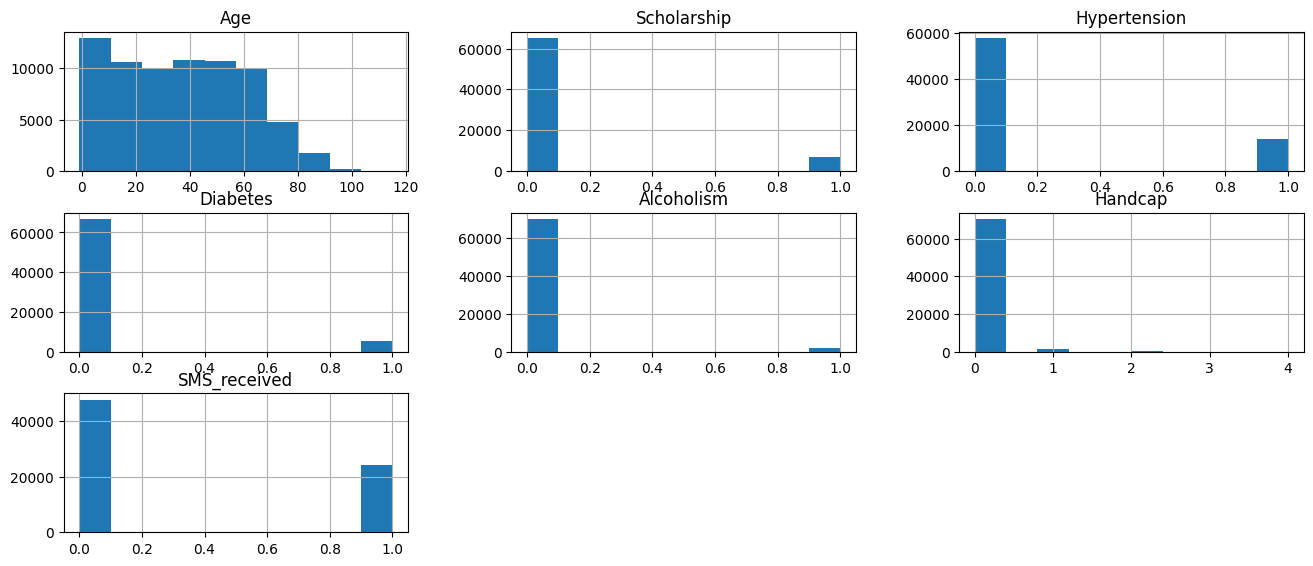

In [18]:
#Use this, and more code cells, to explore the data. 
# show histogram for each column in dataset
#put semicol at the end to remove all word tha appears after the char

df.hist(figsize=(16,6.5));

In [19]:
#dividing the patients to 2 groups accordinging to showing or no showing then exploring them 
show=df.No_show=='No'
noshow=df.No_show=='Yes'
df[show].count(),df[noshow].count()

(Gender           54154
 Age              54154
 Neighbourhood    54154
 Scholarship      54154
 Hypertension     54154
 Diabetes         54154
 Alcoholism       54154
 Handcap          54154
 SMS_received     54154
 No_show          54154
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

It seems that number of showed patients is (54154) 3 times greater than non showed patients

In [43]:
#display average for showed and non showed patients
df[show].mean(),df[noshow].mean(numeric_only=True)

C:\Users\Aya.Samir\AppData\Local\Temp\ipykernel_8756\1843305552.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[show].mean(),df[noshow].mean(numeric_only=True)


(Age             37.228460
 Scholarship      0.091332
 Hypertension     0.202940
 Diabetes         0.072866
 Alcoholism       0.023599
 Handcap          0.020903
 SMS_received     0.297226
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

mean age for showed patients is 37, no showed is 34 patients recieved sms less than no showed patients which means we have to revise our sms compaghine

# Investigation for the influencing Factors on the attendance rate

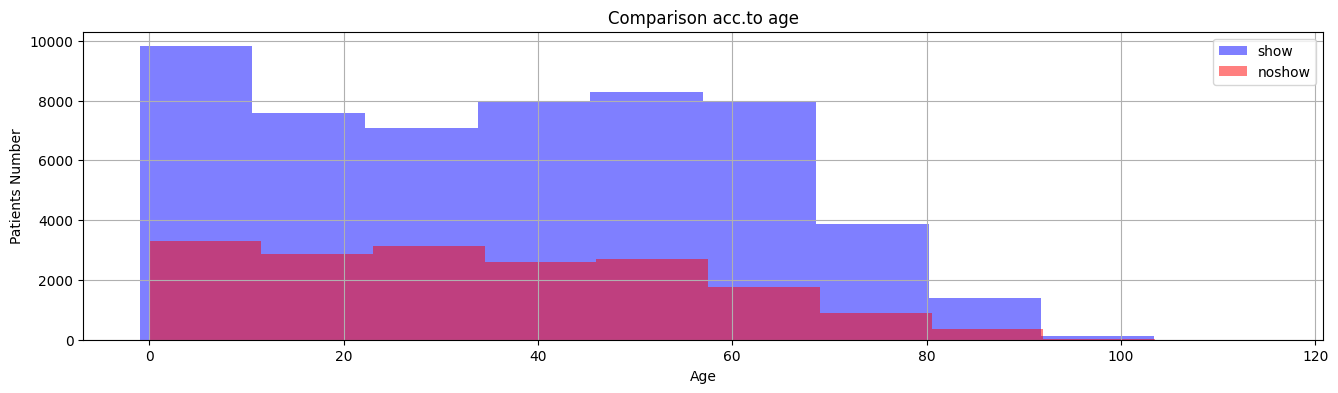

In [21]:
#does Age affect the attendance 
def attendance(df,col_name,attended,absent):#setting
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=10,color='blue',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10,color='red',label='noshow')
    plt.legend();
    plt.title('Comparison acc.to age')
    plt.xlabel('Age')
    plt.ylabel('Patients Number')
attendance(df,'Age',show,noshow)

It seems thaty ages from 0:8 are the most showing (parenyts taking care of their kids)then from 45:55 and the least attending are whom above65 ydears old.

C:\Users\Aya.Samir\AppData\Local\Temp\ipykernel_8756\2898469677.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
C:\Users\Aya.Samir\AppData\Local\Temp\ipykernel_8756\2898469677.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='noshow')


Text(0, 0.5, 'Mean age ')

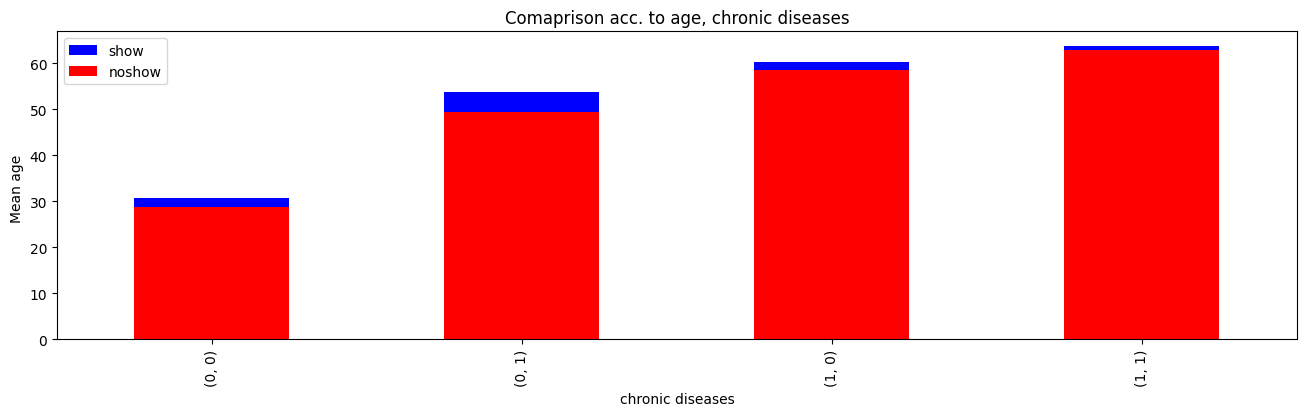

In [42]:
#does age and chronic diseases affect the attending together
plt.figure(figsize=[16,4])#setting the figure size 
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title ('Comaprison acc. to age, chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age ')

In [41]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']

C:\Users\Aya.Samir\AppData\Local\Temp\ipykernel_8756\1790594365.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']
C:\Users\Aya.Samir\AppData\Local\Temp\ipykernel_8756\1790594365.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']


(Hypertension  Diabetes
 0             0           30.712613
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

from the previous it seesms that mean age of non chronic diseases showing patients is 30 and non showing is 28 mean age of Hypertensieve diabetic showing patients is around 64 and non showing is about 63 which means that there is a correlation between age and chronic diseases, and no correlation between diseases and attending 

Does Gender affect the attendance?

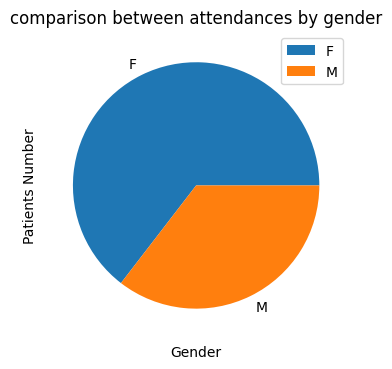

In [24]:
#what is the percentage of sexes attending?
def attendance (df,col_name,attended,absent):
    plt.figure(figsize=[12,4])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('comparison between attendances by gender')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number');
attendance(df,'Gender',show,noshow)

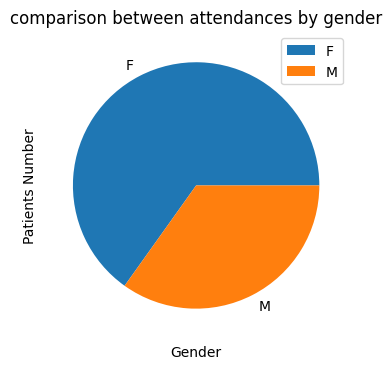

In [25]:
#what is the percentage of sexes attending?
def attendance (df,col_name,attended,absent):
    plt.figure(figsize=[12,4])
    df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('comparison between attendances by gender')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number');
attendance(df,'Gender',show,noshow)

It seems that Gender has no effect on attandance

In [26]:
# Does ages and chronic gender affect the attendance together (check by gender mean age)


Text(0, 0.5, 'Mean age ')

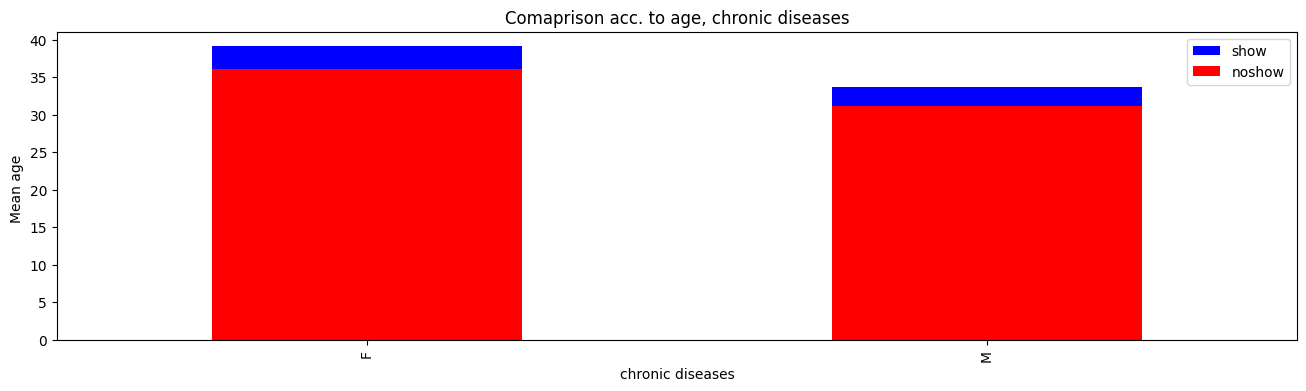

In [27]:
#does age and chronic diseases affect the attending together
plt.figure(figsize=[16,4])#setting the figure size 
df[show].groupby('Gender').Age.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Gender').Age.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title ('Comaprison acc. to age, chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age ')

In [28]:
print(df[show].groupby('Gender').Age.mean(),df[noshow].groupby('Gender').Age.mean(),
     df[show].groupby('Gender').Age.median(),df[noshow].groupby('Gender').Age.median)

Gender
F    39.129144
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39.0
M    32.0
Name: Age, dtype: float64 <bound method GroupBy.median of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000002DDC947A470>>


From the previous it seems there is no correlation between age and gender affecting the show rate 
the mean and the median of sexes ages are almost the same 

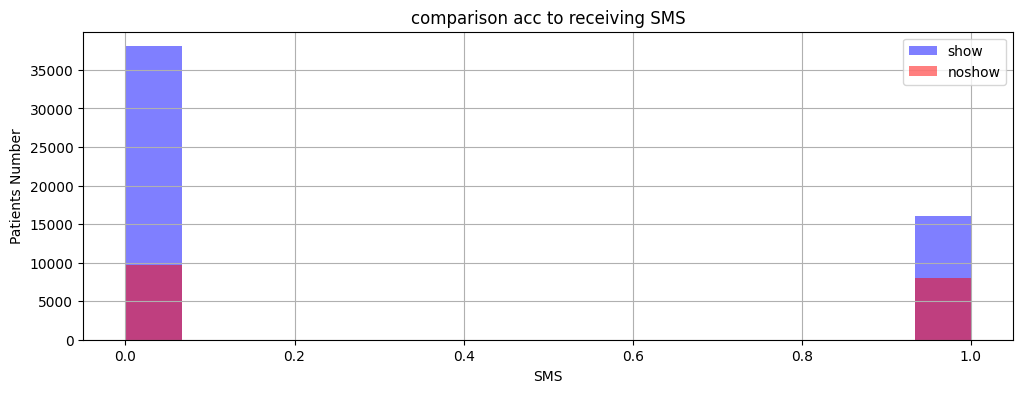

In [29]:
#does recieving sms affecting attendance
#what is the percentage of sexes attending?
def attendance (df,col_name,attended,absent):
    plt.figure(figsize=[12,4])
    df[col_name][show].hist(alpha=.5,bins=15,color='blue',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=15,color='red',label='noshow')
    plt.legend();
    plt.title('comparison acc to receiving SMS')
    plt.xlabel('SMS')
    plt.ylabel('Patients Number');
attendance(df,'SMS_received',show,noshow)

Number of showing patients without recieving recieving sms is greater than patients with recieving sms, which means that we need to revisit our sms campagin

Text(0, 0.5, 'Patient Number ')

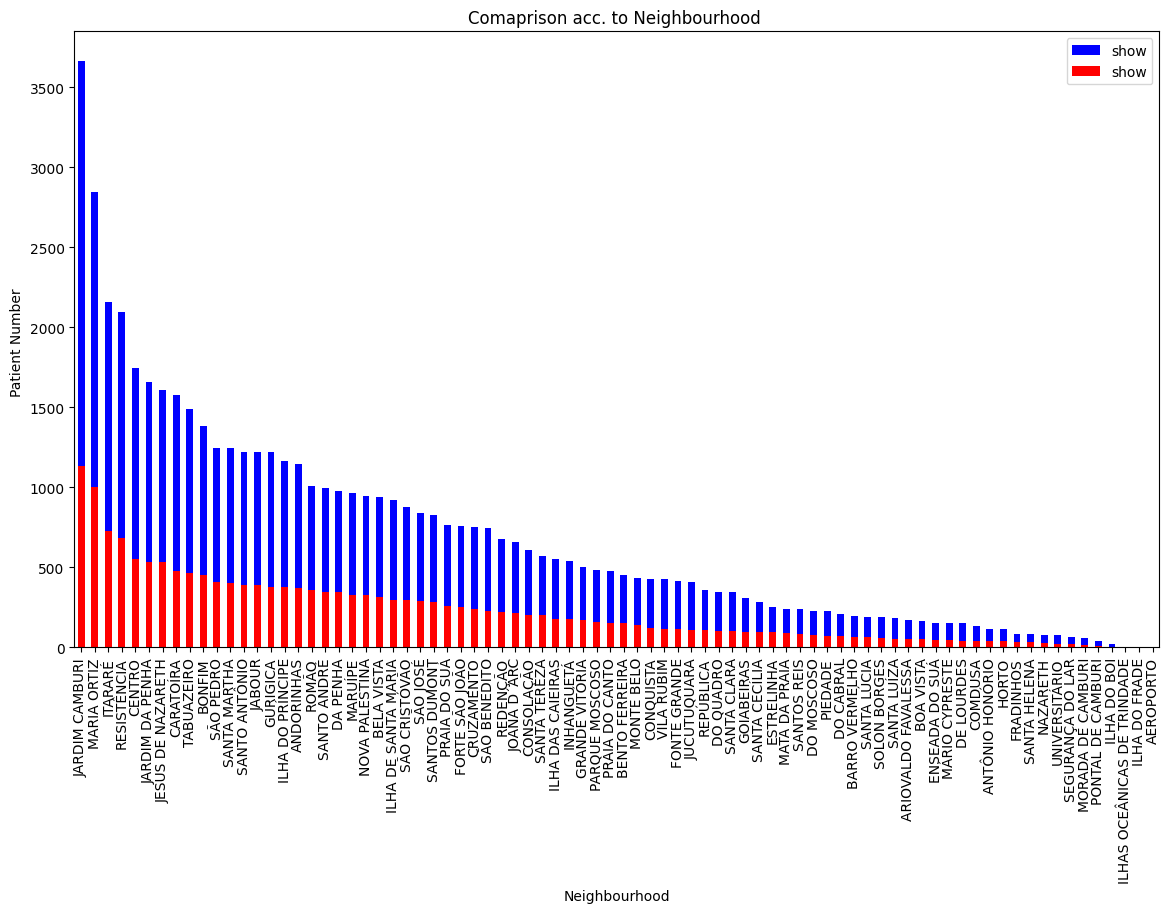

In [30]:
#does neighbourhood affect the attendance
plt.figure(figsize=[14,8])#setting the figure size 
df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='red',label='show')
plt.legend();
plt.title ('Comaprison acc. to Neighbourhood ')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient Number ')

Neighbourhood has a great effect on attendeance or not,JARDIM Hhas the greatest number of patients and also has the greatest showing rate 

Text(0, 0.5, 'Patient Number ')

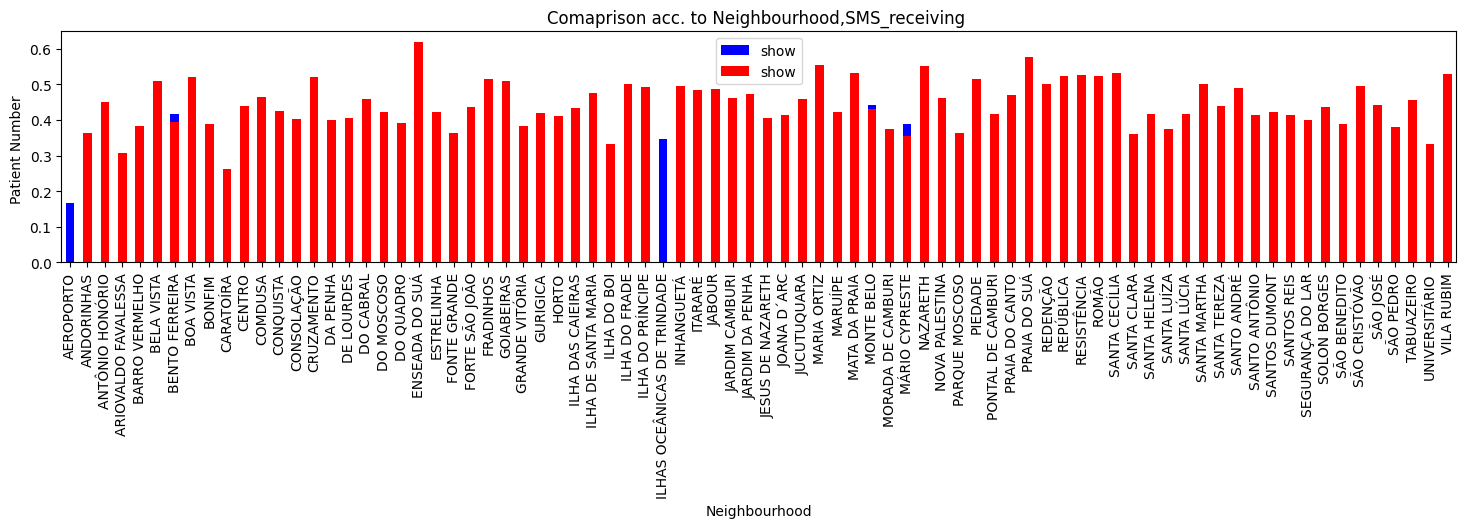

In [31]:
#does sms differ regarding neighbourhood   the
plt.figure(figsize=[18,3])#setting the figure size 
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='red',label='show')
plt.legend();
plt.title ('Comaprison acc. to Neighbourhood,SMS_receiving ')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient Number ')

SMS has response in only 5 neighbourhoods  ILHAS OCEANICAS DE TRINDAND is the most responsive neighbourhoodto sms 

Text(0, 0.5, 'Mean Age ')

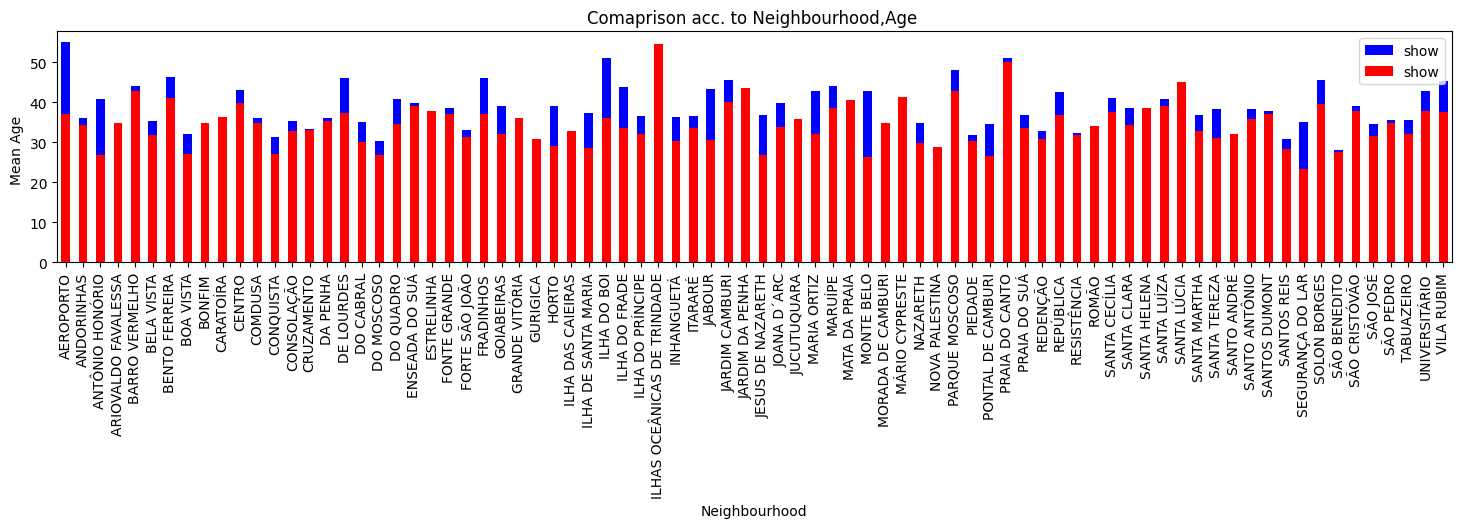

In [32]:
#does ages differ among countries regarding show or now show 
plt.figure(figsize=[18,3])#setting the figure size 
df[show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='red',label='show')
plt.legend();
plt.title ('Comaprison acc. to Neighbourhood,Age ')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Age ')

Patients attendance from specific neighbourhood differ acc. to ages AEROPORTO then LHA DO BOI are with high ages attendance

# Conclusion

Neighbourhood has a great effect on attendance or not, JARDIM CAMBURI has the greatest number of patients and also has the greatest showing rate.

Number of showing patients from specific neighbourhood affected by receiving SMS and Ages.

Ages has a clear influence on the showing raet Aages from 0:8 are the most showing (parents take care of their kids)then from 48:55 and the least attending are whom above 65 years old.

Number of showing patients without receiving sms is greater thann showing patients with receiving sms, which means that we need to revisit our sms campaghin

# Limitations

No clear correlation between showing and gender, choronic diseases, enrollement in the welfare program

In [47]:
from subprocess import call

# Call the nbconvert command to convert the notebook to PDF
call(['jupyter', 'nbconvert', 'Investigate_a_dataset.ipynb'])


1

In [53]:
from nbconvert import PDFExporter
from nbformat import read, reads

# Load the notebook
notebook_file = 'Investigate_a_dataset.ipynb'

# Read the notebook content using nbformat.read
with open(notebook_file, 'r', encoding='utf-8') as f:
    notebook_content = f.read()

# Convert the notebook content to a NotebookNode
notebook_node = reads(notebook_content, as_version=4)

# Create a PDFExporter instance
pdf_exporter = PDFExporter()

# Convert the notebook to PDF
pdf_output, _ = pdf_exporter.from_notebook_node(notebook_node)

# Save the PDF to a file
pdf_output_file = 'Investigate_a_dataset.pdf'
with open(pdf_output_file, 'wb') as f:
    f.write(pdf_output)


PandocMissing: Pandoc wasn't found.
Please check that pandoc is installed:
https://pandoc.org/installing.html